<h1 style="background-color:yellow;"> Understanding the business

This time, we will examine a classic case seen in econometrics classes: which possible variables can explain the per capita GDP of a given population.

Macroeconomic theoretical foundations can provide insight into these types of relationships. Note that the fundamental macroeconomic equation is defined as follows.

$$Y = C + I + G + NX $$

where Y refers to the GDP of the population, C to consumption, I to investment, G to public spending and NX to net exports.

In this case, variables related to consumption or net exports will not be considered. However, an attempt will be made to study the relationship using variables related to public spending and investment, such as the electricity access rate, a literacy rate, an internet usage rate, among others.

<h1 style="background-color:yellow;"> Data Comprehension.

### **Data structuring:** 

Understanding that for the development of the project different tables from the World Bank's open data portal are used, the following section is dedicated to structuring the information from the different indexes in a single table.

In [1]:
# import all the libraries used in this project

# Data and vectors libraries
import pandas as pd 
import numpy as np

# Plot Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# ML preprocesing librearies
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Ml Models librearies
from sklearn.linear_model import LinearRegression

# ML Model Evaluation Libraries
from sklearn.metrics import r2_score, mean_squared_error

In [157]:
# def edit_sub_df() - > pd.DataFrame:
    
    

def get_data(year:str) -> pd.DataFrame:
    
    """
    This function interacts with the GitHub repository to load and transform
    data from the uploaded World Bank files.
    
    #   Args:
      - year: year to filter the different indicators.
    """

    repo_url = "https://raw.githubusercontent.com/BautistaDavid/Udacity-data-scientist-program/"
    root_url = repo_url + "/refs/heads/main/project1/data/"
    
    pib_per_url = root_url + "API_NY.GDP.PCAP.CD_DS2_es_csv_v2_30456.csv"
    pib_percapita = pd.read_csv(pib_per_url,sep=',', skiprows=4)

    pib_percapita.columns = pib_percapita.columns.str.lower().str.split(' ').str.join('_')
    pib_percapita = pib_percapita[['country_code',year]]
    pib_percapita = pib_percapita.rename(columns={year:'pib_percapita'})
    
    elec_url = root_url + 'API_EG.ELC.ACCS.ZS_DS2_es_csv_v2_41308.csv'
    electricidad = pd.read_csv(elec_url,sep=',',skiprows=4)
    electricidad.columns = electricidad.columns.str.lower().str.split(' ').str.join('_')
    electricidad = electricidad[['country_code',year]]
    electricidad = electricidad.rename(columns={year:'acceso_electricidad'})
    
    int_url = root_url + 'API_IT.NET.USER.ZS_DS2_es_csv_v2_42842.csv'
    usuarios_internet = pd.read_csv(int_url,sep=',',skiprows=4)
    usuarios_internet.columns = usuarios_internet.columns.str.lower().str.split(' ').str.join('_')
    usuarios_internet = usuarios_internet[['country_code',year]]
    usuarios_internet = usuarios_internet.rename(columns={year:'usuarios_internet'})

    alf_url = root_url + "API_SE.ADT.LITR.ZS_DS2_es_csv_v2_42745.csv"
    alfabetizacion = pd.read_csv(alf_url,sep=',',skiprows=4)
    alfabetizacion.columns = alfabetizacion.columns.str.lower().str.split(' ').str.join('_')
    alfabetizacion = alfabetizacion[['country_code',year]]
    alfabetizacion = alfabetizacion.rename(columns={year:'tasa_alfabetizacion'})

    esperanza_url = root_url + "API_SP.DYN.LE00.IN_DS2_es_csv_v2_23756.csv" 
    esperanza = pd.read_csv(esperanza_url,sep=',',skiprows=4)
    esperanza.columns = esperanza.columns.str.lower().str.split(' ').str.join('_')
    esperanza = esperanza[['country_code',year]]
    esperanza = esperanza.rename(columns={year:'esperanza_al_nacer'})
    
    gasto_edu_url = root_url + "API_SE.XPD.TOTL.GB.ZS_DS2_es_csv_v2_46468.csv"
    gasto_educacion = pd.read_csv(gasto_edu_url,sep=',',skiprows=4)
    gasto_educacion.columns = gasto_educacion.columns.str.lower().str.split(' ').str.join('_')
    gasto_educacion = gasto_educacion[['country_code',year]]
    gasto_educacion = gasto_educacion.rename(columns={year:'gasto_educacion'})
    

    final_tab = pib_percapita.merge(electricidad,on='country_code',how='inner').merge(
          usuarios_internet,on='country_code',how='inner').merge(
              alfabetizacion,on='country_code',how='inner').merge(
                  esperanza,on='country_code',how='inner').merge(
                    gasto_educacion,on='country_code',how='inner'
                    )


    return final_tab

In [224]:
# Use the get_data function to structure the main data frame and then remap columns
df = get_data('2017') 
df = df.rename(columns={'pib_percapita':'gdp_percapita',
                       'acceso_electricidad':'access_to_electricity',
                        'usuarios_internet':'internet_users',
                        'tasa_alfabetizacion':'literacy_rate',
                        'esperanza_al_nacer':'life_expectancy',
                       'gasto_educacion':'spending_education'})



In [225]:
df.info() # info method

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 265
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_code           266 non-null    object 
 1   gdp_percapita          258 non-null    float64
 2   access_to_electricity  263 non-null    float64
 3   internet_users         210 non-null    float64
 4   literacy_rate          79 non-null     float64
 5   life_expectancy        265 non-null    float64
 6   spending_education     210 non-null    float64
dtypes: float64(6), object(1)
memory usage: 16.6+ KB


In [226]:
# Use the info() method to initially explore the dataset.
df.head()

,country_code,gdp_percapita,access_to_electricity,internet_users,literacy_rate,life_expectancy,spending_education
0,ABW,28440.051964,100.000000,97.2,NaN,75.620000,18.521408
1,AFE,1520.212231,40.223744,NaN,71.029984,62.591275,17.238126
2,AFG,525.469771,97.700000,13.5,NaN,62.406000,8.202472
3,AFW,1574.230560,48.900728,NaN,56.472198,56.626439,16.137780
4,AGO,2437.259712,42.900000,26.0,NaN,62.122000,6.763777


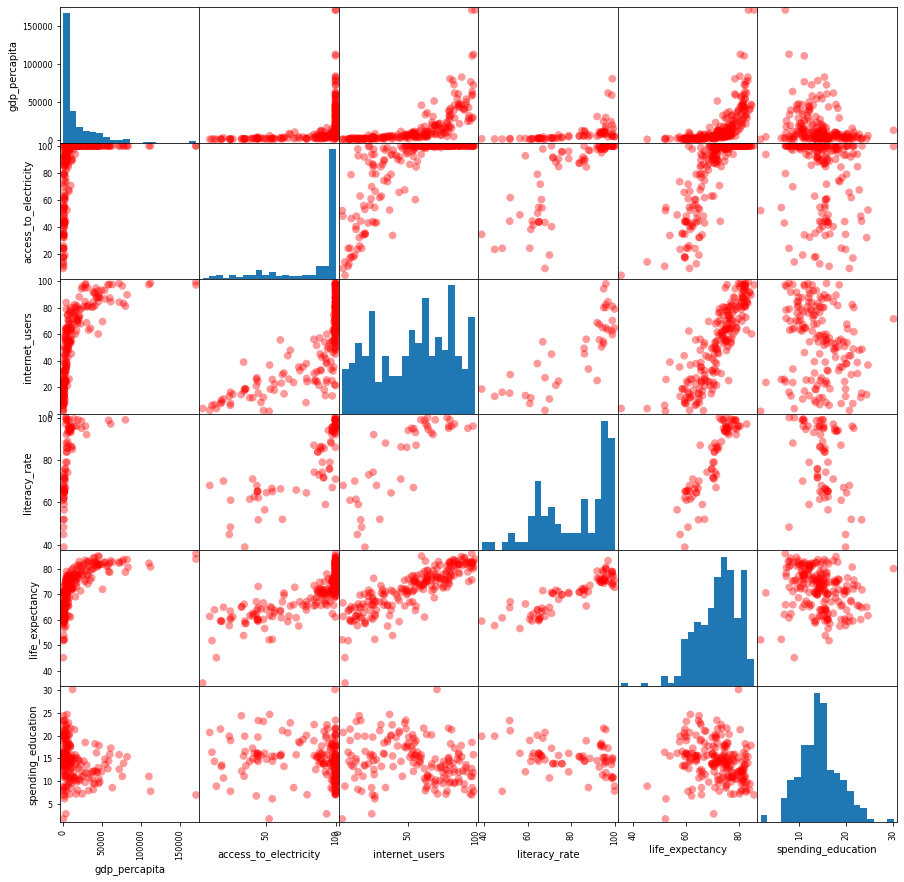

In [227]:
# Let's use a scatter matrix to study distributions and correlations between pairs of variables.

pd.plotting.scatter_matrix(df.drop(columns=['country_code']), figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.4,c='red')
plt.show()

### Is there a linear correlation between the variables? If so, in what direction do the different correlations occur?

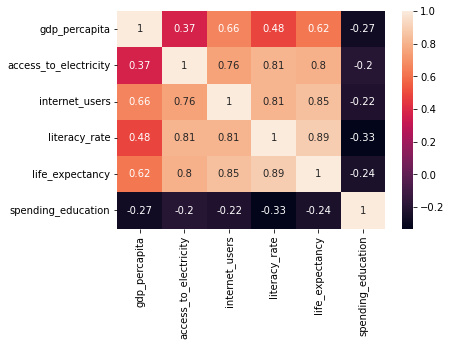

In [228]:
# Lets study correlations between variables
sns.heatmap(df.drop(columns=['country_code']).corr(),
           annot=True)
plt.show()

All correlations between pairs of observed variables are positive, the most notable being the correlation between the literacy rate and life expectancy at birth.

### Are there outliers in any of the variables?

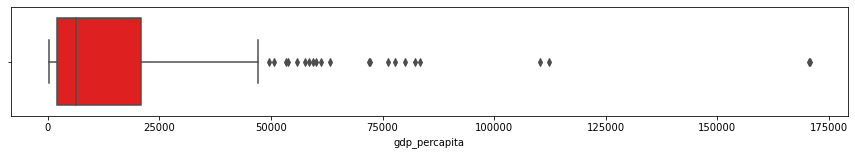

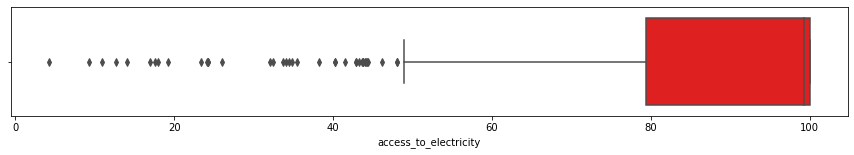

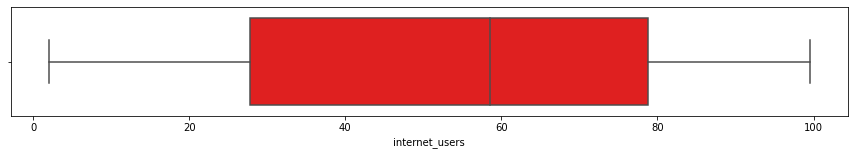

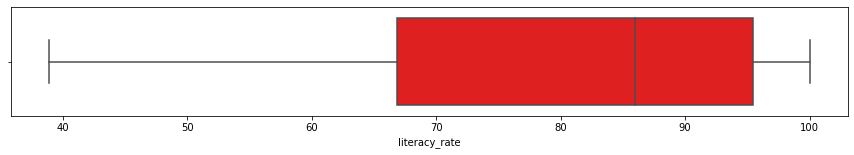

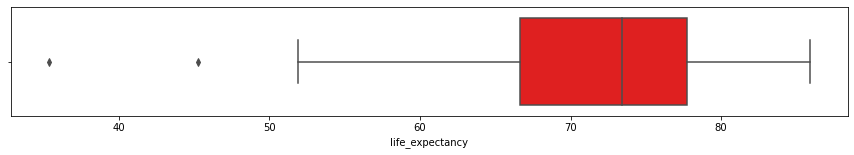

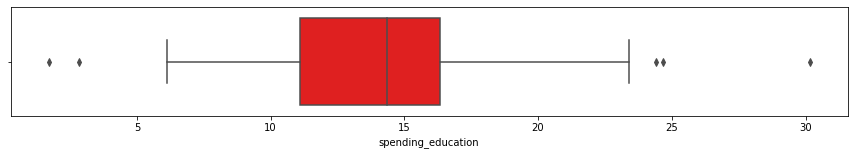

In [229]:
# df['gdp_percapita']

for i in df.drop(columns=['country_code']):
    fig = plt.figure(figsize=(15,2))
    sns.boxplot(data=df,x=i,color='r')
    plt.show()
#     print(i)

There Is Outliers in the next variables: **gdp_per_capita**, **acces_to_electricy** and **spending_education**.

### How high is the GDP per capita of the 5% of countries with the highest GDP per capita?

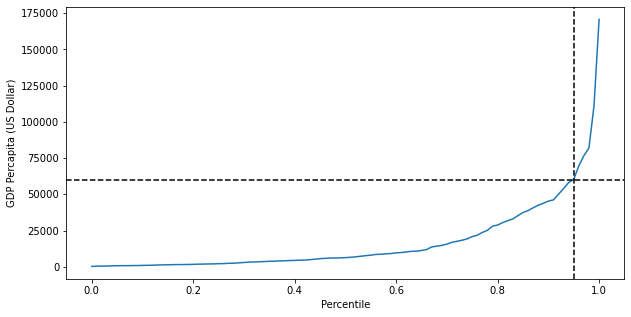

In [230]:
### 

x = df['gdp_percapita'].quantile([i/100 for i in range(101)]).index
y = df['gdp_percapita'].quantile([i/100 for i in range(101)]).values

fig = plt.figure(figsize=(10,5))
plt.plot(x,y)
plt.axvline(0.95,color='black',linestyle='--')
plt.axhline(60000,color='black',linestyle='--')
plt.ylabel("GDP Percapita (US Dollar)")
plt.xlabel("Percentile")
plt.show()

5% of the countries in the sample with the highest GDP per capita have a GDP per capita greater than approximately 60 thousand dollars.

###  **Data Description:** 

The current table contains five key variables, along with an additional one that indicates the country from which each specific record is drawn. Below is a brief description of the meaning and logic behind each variable:

**gdp_percapita**: Represents the Gross Domestic Product per capita, which measures the average economic output per person in a given country. It is often used as an indicator of a country's economic performance and standard of living.

**access_to_electricity**: Indicates the percentage of the population with access to electricity. This is a basic infrastructure indicator and reflects the level of development in energy distribution within each country.

**internet_users**: Refers to the percentage of individuals using the internet. This variable provides insight into digital connectivity and access to information technologies.

**literacy_rate**: Represents the percentage of the adult population that can read and write. It is a fundamental indicator of educational attainment in a country.

**life_expectancy**: Refers to the average number of years a newborn is expected to live, assuming current mortality rates remain constant. It is commonly used as a proxy for overall health and well-being in a population.

country: Identifies the country associated with each record. This variable serves as a reference for geographic segmentation and comparison across nations.


## Data Quality:



In [231]:
print('% Null Values')
df.isnull().sum() / df.shape[0]

% Null Values


country_code             0.000000
gdp_percapita            0.030075
access_to_electricity    0.011278
internet_users           0.210526
literacy_rate            0.703008
life_expectancy          0.003759
spending_education       0.210526
dtype: float64

Most variables in the dataset have a missing values percentage of less than 22%, ensuring good reliability of the analysis for at least some variables. However, the variable "literaty_rate" has a significantly higher proportion of missing data compared to the others. Due to this limitation, and to maintain the consistency and robustness of the study, we decided to exclude "literaty_rate" from the analysis.

On the other hand, we will attempt to impute the null values for the variables internet access and health expenditure with the 25th percentile of the distribution, assuming that missing information indicates a lesser level of development in the reference country.

<h1 style="background-color:yellow;"> Data Preparation

In [236]:
# Troubleshooting missing values with "business rules"
df_clean = df
df_clean.loc[df_clean['internet_users'].isnull(),'access_to_electricity'] = df_clean['access_to_electricity']
df_clean['spending_education'].fillna(df_clean['spending_education'].quantile(0.25),inplace=True)
df_clean['internet_users'].fillna(df_clean['internet_users'].quantile(0.25),inplace=True)

df_clean = df.drop(columns=['literacy_rate','access_to_electricity']).dropna()

X = df_clean.drop(columns=['country_code','gdp_percapita'])
y = df_clean['gdp_percapita']

As part of the data preparation process, we removed the column with an excessively high percentage of missing values. Although imputation techniques could have been considered, we do not have sufficient supporting variables to perform this process without potentially distorting the relationships between the predictors and the target variable.

Additionally, we retained only those records for which none of the remaining variables contain missing values.

<h1 style="background-color:yellow;"> Modeling

In [238]:
# Modeling
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=777,train_size=0.7)

rlm = LinearRegression()
rlm.fit(X_train,y_train)


LinearRegression()

<h1 style="background-color:yellow;"> Evaluation

In [247]:

y_train_predict = rlm.predict(X_train)

print('Root Mean Squared Error - Train Set: ',mean_squared_error(y_train,y_train_predict)**0.5)
print('R2 Score - Train Set: ',r2_score(y_train,y_train_predict))
print('---'*20)

y_test_predict = rlm.predict(X_test)


print('Root Mean Squared Error - Test Set: ',mean_squared_error(y_test,y_test_predict)**0.5)
print('R2 Score - Test Set: ',r2_score(y_test,y_test_predict))
print('---'*20)

Root Mean Squared Error - Train Set:  17367.856684434217
R2 Score - Train Set:  0.45453566855132854
------------------------------------------------------------
Root Mean Squared Error - Test Set:  20253.875693016507
R2 Score - Test Set:  0.3998681192869268
------------------------------------------------------------


We do not have very high R-squared values, which could suggest that we should expand our exploration of variables that can better explain the variance of per capita GDP, or at the same time, we could understand that the model presents some problems such as multicollinearity between the independent variables. Now, on the part of RMSE, we have that the test set shows an average deviation of $20,000 from the actual value, which is actually a high value considering the context of the problem.

### Interpretability of the results

In [246]:

b = rlm.coef_  #  (coeficccients)
a = rlm.intercept_  # Intercept

print('Variables: ',[i for i in df_clean.columns[2:]])
print(f"Coefficients: {b}")
print(f"Intercept: {a}")

Variables:  ['internet_users', 'life_expectancy', 'spending_education']
Coefficients: [ 251.72733285 1242.33813908 -554.91230027]
Intercept: -78319.21547864651


### Model Interpretation

Although our model's performance metrics are not particularly strong, we can still explore some degree of interpretability by examining the regression coefficients of each variable. 

As a first approach—setting aside the magnitude of the coefficients due to the model’s limited explanatory power—we observe a *positive relationship* between variables such as *internet users* and *life expectancy* with the *GDP per capita* of each country. On the other hand, we find a *negative relationship* between the *percentage of government expenditure on education* and GDP per capita.

These relationships are generally consistent with economic reasoning. Specifically, the negative association between education spending and GDP per capita may be explained by the fact that *investment in education does not translate into immediate increases in economic output*. In a macroeconomic context, the population in education stages tends to have high consumption levels but relatively low productive output in the short term.

<h1 style="background-color:yellow;"> General conclusions / Recommendations.

### Conclusion

While the model provides some initial insights into the relationship between variables such as internet usage, life expectancy, and public investment in education with GDP per capita, its overall performance leaves room for improvement.

To enhance the model's predictive power and interpretability, several aspects could be refined:

- **Expanding the exploration of variables**: Incorporating additional economic, institutional, and demographic indicators could capture a more complete picture of the drivers of GDP per capita.
- **Normalization and transformation** of certain predictors: Variables measured on very different scales or with skewed distributions might benefit from normalization or logarithmic transformations to improve model stability.
- **Adopting more advanced econometric approaches**, such as **panel data models** or **lag-based models**, may be particularly useful. These approaches can better account for **time-lagged effects**, recognizing that investments in education, improvements in internet access, or gains in life expectancy may not have an immediate impact on GDP per capita, but rather produce effects over the following years.

In future iterations, using models that capture **temporal dynamics** could significantly improve our understanding of how structural variables contribute to long-term economic development.